### Load dataset

In [1]:
%run "..\\Model\\DataHelpers.ipynb"

FILE_PATH = f"../Data/patient_genes_lasso.csv"
FILE_PATH_VALIDATION = f"../Data/validationset.csv"

GENE_FILE_VARIANT = 'lasso'
featuresLASSO = [ 'CD1A'  , 'CSF2RB', 'EPCAM' , 'ERBB2'  , 'ESR1'    ,
                  'EZH2'  , 'FGB'   , 'FOXA1' , 'FOXC1'  , 'GATA3'   , 
                  'LAMA2' , 'LMNA'  , 'MDGA2' , 'OBSCN'  , 'OGN'     , 
                  'PGR'   , 'SELL'  , 'SRC'   , 'TACSTD2', 'TBC1D22B', 
                  'TFF1'  , 'TGFB3' , 'UBE2C' , 'VTCN1'  ,'WTAP'     , 
                  'YES1'  , 'YOD1' ]

df = pd.read_csv(FILE_PATH)
dfValidation = pd.read_csv(FILE_PATH_VALIDATION)

In [2]:
dfValidation = pd.concat([dfValidation[dfValidation['tnbc'] ==False], dfValidation[dfValidation['tnbc'] ==True].head(15)])

In [3]:
total = len(ModelVariant)
counter = 1

for modelName in ModelVariant.__members__:
    print(f'{counter}/{total} - Applying {modelName} to features - Start')
    model = getModel(modelName)

    ### Dataset split: training and test data
    X, y, X_train, X_test, y_train, y_test, test_case_ids = split_data(df, "tnbc", True)
    
    y_pred, y_prod = run_model(model, X_train, X_test, y_train, y_test, test_case_ids, False, modelName)
    print_evaluated_model_accuracy(y_test, y_pred)

    metrics = run_cross_validation(model, X, y, y_test, y_pred, y_prod, False, modelName)

    ### Validation
    X_val = dfValidation[featuresLASSO]
    y_val = dfValidation['tnbc']
    test_case_ids_val = dfValidation['case_id']

    y_pred, y_prod = run_model_validation(model, X_val, y_val, test_case_ids_val)
    print_evaluated_model_accuracy(y_val, y_pred)

    metrics = run_cross_validation_validation(model, X, y, y_val, y_pred, y_prod)

    print(f'{counter}/{total} - Applying {modelName} to features - End')
    counter += 1

    

1/3 - Applying SVM to features - Start
X_train.shape=(781, 27)
X_test.shape=(196, 27)
y_train.shape=(781,)
y_test.shape=(196,)
Accuracy: 0.95
Model validation for SVC:
[0.9489795918367347, 0.9489795918367347, 0.958974358974359, 0.9487179487179487, 0.9487179487179487]

Mean accuracy: 0.9509

Accuracy: 0.91
Model validation for SVC:
[0.9489795918367347, 0.9489795918367347, 0.958974358974359, 0.9487179487179487, 0.9487179487179487]

Mean accuracy: 0.9509

1/3 - Applying SVM to features - End
2/3 - Applying RF to features - Start
X_train.shape=(781, 27)
X_test.shape=(196, 27)
y_train.shape=(781,)
y_test.shape=(196,)
Accuracy: 0.96
Model validation for RandomForestClassifier:
[0.9591836734693877, 0.9489795918367347, 0.9487179487179487, 0.9384615384615385, 0.9384615384615385]

Mean accuracy: 0.9468

Accuracy: 0.88
Model validation for RandomForestClassifier:
[0.9591836734693877, 0.9489795918367347, 0.9487179487179487, 0.9384615384615385, 0.9384615384615385]

Mean accuracy: 0.9468

2/3 - Appl

C:\Data\998_Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Bonus

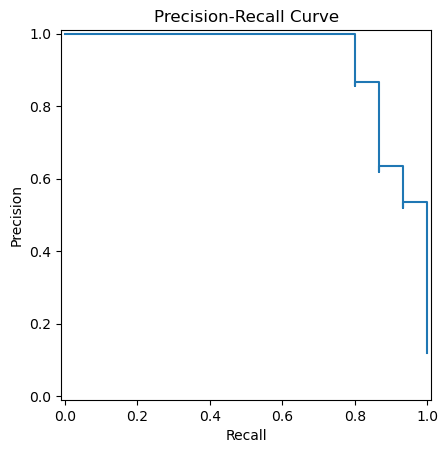

In [74]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities
kevin_y_scores = model.predict_proba(X_val)[:, 1]  # Probability for class "True"

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, kevin_y_scores)

# Plot
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()


In [4]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
print(dict(zip(classes, weights)))


{False: 0.5667634252539913, True: 4.244565217391305}


array([False,  True])

In [9]:
np.bincount(y)[0]*

862

In [12]:
# sci kit learn
# n_samples / (n_classes * np.bincount(y))

y_train / (len(classes) * (np.bincount(y)[0]))


758    0.00058
579    0.00000
487    0.00000
593    0.00058
403    0.00000
        ...   
408    0.00000
32     0.00000
884    0.00000
504    0.00000
580    0.00000
Name: tnbc, Length: 781, dtype: float64